In [80]:
NAME = "Esther Yang"
COLLABORATORS = "Nikita, Norika"

# Plagiarism detector



## Question 1: Implementation Ver.1 (rolling hashing)

Suppose each student submission is a string that is a result of concatenating all the words there (i.e., white spaces are
removed). Let X and Y be two student submission strings. Find all the common substrings of length k (known as
k-gram) of the two strings. In other words, determine all (i,j) where X[i:i+k]=Y[j:j+k].

For example, X="today is Monday", Y="day". All possible (i,j) from these two strings are (2,0) and (10,0) for k=3 (“day"
appears twice in X, and we disregard the white spaces).

The first algorithm is as follows:
- Store all length-k substrings of X into a hash table T_X with the hash values computed by using **rolling hashing**.

- For each substring S_y in Y, compute the hash value h(S_y)using rolling hashing, and use this hash value to look up S_y in table T_x. If the lookup is successful, then we have a common substring.

Using this algorithm, complete the function below. 
- You will need to specify q for the hash function a mod q in rolling hashing. However, do not worry about fine-tuning q—so long as you choose a prime number and provide a justification for why your chosen value of q makes sense with regards to the table size.

- Other design choices should be thoroughly justified, including but not limited to: the hash table’s size, data structures used, and any additional Python functions.

- No external libraries should be used, except for math, random, and numpy.

**Justification for design choices:**
- the hash table's size: we match q with the hash table size. We choose q as a prime number. The reason for choosing a prime number is to avoid collisions and distribute hash values equally in a hash table. An integer that shares a common factor will often be hashed into an index that is multiple factors. We choose prime numbers because they are only divisible by 1 and themselves to avoid collisions. Hence, I create a generator for prime numbers based on a lower and upper bound. As for deciding a prime number, I calculate the average bucket size and percentage of collisions, aiming for low collisions and average bucket size = 1. 

- data structures: I choose to use a nested list because I  can easily check the string append. It creates some space but since I adjust my q correspondingly, the string in the hash table is evenly distributed. 




### Pre-processing 
Pre-processing our input text 

In [81]:
def preprocessing(text): 
  
  """Preprocessing the input text  
    
    Inputs
    --------
    text: str
    
    Outputs
    --------
    str
        string after preprocessing 

  """ 
  text = text.lower().replace("!", "").replace("?", "").replace(".", "").replace(",", "")\
            .replace(";", "").replace("*", "").replace(';','').replace('\'','').replace(' ','')\
            .replace("1",'').replace("2",'').replace("3",'').replace("4",'').replace("5",'').replace("6",'')\
            .replace("7",'').replace("8",'').replace("9",'').replace("0",'')\
            .replace("that",'').replace("the ",'').replace("a ",'').replace("an ",'')\
            .replace("\n",'').replace("\ufeff",'')
  #change text into lower case and delete special characters

  return text 


### Hash value calculator
Calculate initial hash value and hash value after rolling 

In [82]:
def initial_hash_value(string, d, q): 
  '''Calculate hash value of a string 
  
    Inputs
    --------
    string: str
    d: base 
    q: size of our hash table/our mod
    
    Outputs
    --------
    int
        hash value of the input string 
  '''

  length = len(string)
  hash_value = 0
  for i in range(length):
    hash_value += ord(string[length -i -1])*d**i
  
  return hash_value % q

In [83]:
#Test case to check our hash function is correct 
apple_test = ord('e')*10**0 + ord('p')*10**1 + ord('p')*10**2 + ord('l')*10**3 + ord('a')*10**4
assert initial_hash_value('apple', 10, 5) == (apple_test) % 5

In [84]:
def new_hashvalue(string, new_char, d, q): 
  
  '''A function that calculate hash value after rolling a new character at the right 
    that following the calculation from the handout
  
    Inputs
    --------
    string: str
    new_char: new character we append at the end of the string 
    d: base 
    q: size of our hash table/our mod
    
    Outputs
    --------
    int
        hash value after rolling a new character 

  ''' 
  hash_value = initial_hash_value(string, d, q)
  hashvalue_add = (hash_value*d + ord(new_char)) % q
  hashvalue_del = (hashvalue_add - ord(string[0])*d**(len(string)) %q)%q
  
  return hashvalue_del % q

In [85]:
#Test case
assert new_hashvalue('apple', 'c', 10, 5) == initial_hash_value('pplec',10, 5)
assert new_hashvalue('apple', 'c', 10, 150) == initial_hash_value('pplec',10, 150)
assert new_hashvalue('banana', 's', 3, 8) == initial_hash_value('ananas',3, 8)

### Hash table and rolling string matching algorithm

In [86]:
def empty_hash_table(q):
  '''Create an empty hash table
  
  Inputs
    --------
    q: size of our hash table
    
    Outputs
    --------
    list
        Our hash table with a size of q
  '''

  return [[] for n in range(q)]

In [87]:
def rh_get_match(x, y, k, q):

  """Finds all common length-k substrings of x and y using rolling hashing on both strings.
  
  Input
  --------
  x, y: two input texts
  k: length of substring
  q: size of the hash table/our mod

  Output:
  --------
  list
    A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
  list 
    Our hash table from x 
  
  """
  result = []
  d = 10 #set base
  x = preprocessing(x)
  y = preprocessing(y)

  #Create an empty hash table 
  hash_table = empty_hash_table(q)

  #if the length of the string is shorter than the required substring length
  if len(y) < k or len(x) < k: 
      return 'The text is too short'


  #hash strings in x and put them into the hashtable
  x_string = x[:k] #The fisrt y substring 
  x_index = initial_hash_value(x_string, d, q)

  for i in range(k,len(x)+1): 
    # x_string = x[n-k:n]
    # index = initial_hash_value(x_string, d, q)
    # new_hashvalue(string, new_char, d, q)
    
    #Apply chaining for the rolling hashing 
    if hash_table[x_index] == None:
      hash_table[x_index] = (x_string, i-k)  
    else:
      hash_table[x_index].append((x_string, i-k))

    #rolling hashing for x  
    if i < len(x):
      x_index = new_hashvalue(x_string, x[i], d, q)
      x_string = x_string[1:] + x[i]
    


  #Apply rolling hash in y to look up hashtable 
  #when the length of y is smaller or equal than k,
  #we check y directly. 
  #when the length of y is greater than k
  #we loop through all characters

  #when the length of y is smaller or equal than k
  if len(y) <= k:
    y_index = initial_hash_value(y, d, q)
    if hash_table[y_index]:
      for s in hash_table[y_index]:
        if s[0] == y:
          result.append((s[1],0))
    return result, hash_table
    
  
  #when the length of y is greater than k
  y_string = y[:k] #The fisrt y substring 
  y_index = initial_hash_value(y_string, d, q)
  
  for i in range(len(y)-k+1):
    #if the hashed index is in the table
    # print(i, y_string)
    if hash_table[y_index]:
      #we check if the characters are the same
      for s in hash_table[y_index]:
        if s[0] == y_string:
          result.append((s[1],i))
      
    #update our y string(roll one character at the right) and its hash value
    if i+k <len(y):
      y_index = new_hashvalue(y_string, y[i+k], d, q)
      y_string = y_string[1:] + y[i+k]
  
  # print('result =', result)
  return result, hash_table

### The level of plagiarism
Compute the percentage of plagiarism and plot the place in a text that have plagiarism. 

In [88]:
import matplotlib.pyplot as plt

def plagiarism_percentage(x,t,k):
  '''Calculate the percentage of plagirism after matching. 
    For instance, for 'apple' in 'applepie', the percentage of plagirism is 
    len(apple)/len(applepie) = 5/8
    For 'day' in 'Today is Monday', the percentage of plagirism is
    len(day)*2/len(TodayisMonday) = 6/13

    Inputs
    --------
    x: input x
    t: matched tuple list 
    k: k-gram/legnth of substring
    
    Outputs
    --------
    str
       The percentage of plagirism
  '''
  x = preprocessing(x)
  plagiarism_set = set()
  for i in t:
    position = i[0] 
    range_list = [i for i in range(position,position+k)] #consider the length of k
    plagiarism_set.update(range_list) #put all plagirism position into a set
  return "{:.0%}".format(len(plagiarism_set)/len(x))


def plagiarism_dist(x,t,k):
  '''Plot the location when plagiarism happens 

    Inputs
    --------
    x: input x
    t: matched tuple list 
    k: k-gram/legnth of substring

    Output
    ------
    A graph demonstrates location of plagiarism in a text 
    
  '''

  x = preprocessing(x)
  plagiarism_set = set()
  for i in t:
    position = i[0] 
    range_list = [i for i in range(position,position+k)] #consider the length of k
    plagiarism_set.update(range_list) #put all plagirism position into a set
  x_axis = [i for i in range(len(x))]
  y_axis = [0 for i in range(len(x))]
  
  for i in x_axis:
    if i in plagiarism_set:
      y_axis[i] = 1
  plt.plot(x_axis, y_axis)
  plt.xlabel('Character Order in a Text')
  plt.ylabel('Plagiarism')
  plt.title('Plagiarism Dectection \n (1= plagiarism, 0 = no plagiarism)')
  plt.show()
  

### Assess our algorithm
compute collisions and average bucket size

In [89]:
def collision(hash_table):
  '''Calculate the percentage of collisions of a hash table 

  Inputs
  --------
  hash_table: A list that contains our hash table 

  Output
  ------
  float
        percentage of collisions in the hash table

  '''
  count = 0 
  for i in range(len(hash_table)): 
    if len(hash_table[i]) > 1: #more than one element in an index 
      count += 1
  return count/len(hash_table)

def average_bucket(hash_table):
  '''Calculate the average bucket size of a hash table 

  Inputs
  --------
  hash_table: A list that contains our hash table 

  Output
  ------
  float
        average length of our hash table when collisions happen
  '''
  non_empty = 0 
  ele_count = 0 
  for i in range(len(hash_table)): 
    if len(hash_table[i]) > 0: #more than one element in an index 
      non_empty += 1
      ele_count += len(hash_table[i])
  return round(ele_count/non_empty,2)

### Test Case
Find different styles of plagiarism and calculate their plagiarism level and plagiarism distribution in a text

#### Test Case 1: Basic test

output =  [(0, 0), (1, 1), (2, 2)]
plagirism percentage 62%


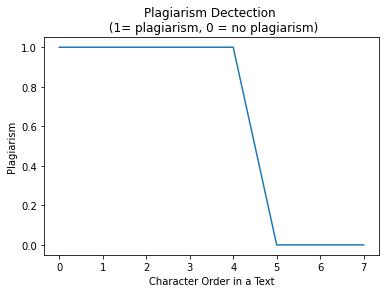

In [90]:
x = 'applepie'
y = 'apple'

output = rh_get_match(x, y, 3, 5)[0]
hash_table = rh_get_match(x, y, 3, 5)[1]
print('output = ', output)
print('plagirism percentage', plagiarism_percentage(x,output,3))
plagiarism_dist(x,output,3)

output =  [(2, 0), (10, 0)]
collisions =  0.6
average bucket size =  2.75
plagiarism percentage 46%


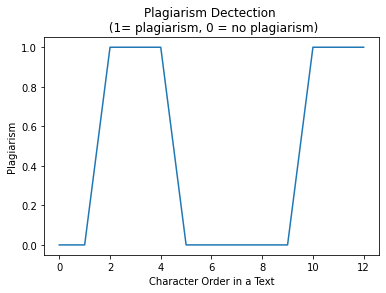

In [91]:
x = 'Today is Monday'
y = 'day'

output = rh_get_match(x, y, 3, 5)[0]
hash_table = rh_get_match(x, y, 3, 5)[1]
print('output = ', output)
print('collisions = ',collision(hash_table))
print('average bucket size = ',average_bucket(hash_table))
print('plagiarism percentage', plagiarism_percentage(x,output,3))
plagiarism_dist(x,output,3)

#### Test Case 2: Find and Replace plagiarism

Find and replace plagiarism is to change some key words of sources, but still copies the main part of sources.

output =  [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (34, 31), (35, 32), (36, 33), (37, 34), (38, 35), (39, 36), (40, 37), (41, 38), (42, 39), (43, 40), (44, 41), (45, 42), (46, 43), (47, 44), (48, 45), (49, 46), (50, 47), (51, 48), (52, 49), (53, 50), (54, 51), (55, 52), (56, 53), (57, 54), (58, 55), (59, 56), (60, 57), (61, 58), (62, 59), (63, 60), (64, 61), (65, 62), (66, 63), (67, 64), (68, 65), (69, 66), (70, 67), (71, 68), (72, 69), (73, 70), (74, 71), (75, 72), (76, 73), (77, 74), (78, 75), (79, 76), (80, 77), (81, 78), (82, 79), (83, 80), (84, 81), (85, 82), (86, 83), (87, 84), (88, 85), (89, 86), (90, 87), (91, 88), (92, 89), (93, 90), (94, 91), (95, 92), (96, 93), (97, 94), (98, 95), (99, 96), (100, 97), (139, 133), (140, 134), (141, 135), (142, 136), (143, 137), (144, 138), (145, 139), (146, 140), (147, 141), (148, 142), (149, 143), (150, 144), (151, 145), (152, 146), (153, 147), (154, 148), (155, 149), (156, 150), (1

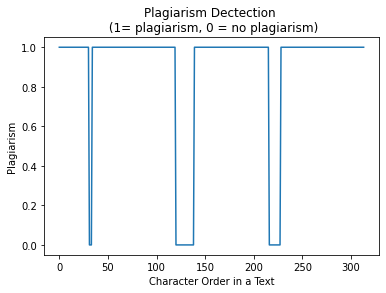

In [92]:
x = 'Elephants are browsing animals, feeding on fruits, leaves, shoots, and tall grasses; \
they consume hundreds of pounds of food a day and drink up to 50 gal (190 liters) of water. \
They have no fixed living place, but travel about in herds of up to 100 animals, led by a young,\
 strong male and including young bulls (males), cows (females), and calves. Old males are \
 generally solitary or live in small groups.'

y = 'Elephants are browsing animals that feed on fruits, leaves, shoots, and tall grasses.\
 They consume hundreds of pounds of food a day and drink up to 50 gal of water. \
 Elephants have no fixed living place, but travel about in herds of up to 100 animals. \
 They are led by a young, strong male. In addition, young bulls (males), cows (females),\
  and calves are part of the group. Old males are generally solitary or live in small groups.'

q = 199
k = 20
output = rh_get_match(x, y, k, q)[0]
hash_table = rh_get_match(x, y, k, q)[1]
print('output = ', output)
print('collisions = ',collision(hash_table))
print('average bucket size = ',average_bucket(hash_table))
print('plagiarism percentage', plagiarism_percentage(x,output,k))
plagiarism_dist(x,output,k)

#### Test Case 3: Mashup plagiarism

Mashup plagiarism is to mix copied information from multiple sources. 

output =  [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (322, 68), (323, 69), (324, 70), (325, 71), (326, 72), (327, 73), (328, 74), (329, 75), (330, 76), (331, 77), (332, 78), (333, 79), (334, 80), (335, 81), (336, 82), (337, 83), (338, 84), (339, 85), (340, 86), (341, 87), (342, 88), (343, 89), (344, 90), (345, 91), (346, 92), (347, 93), (348, 94), (349, 95), (350, 96), (351, 97), (352, 98), (353, 99), (354, 100), (355, 101), (356, 102), (357, 103), (358, 104), (359, 105), (360, 106), (361, 107), (362, 108), (363, 109), (364, 110), (365,

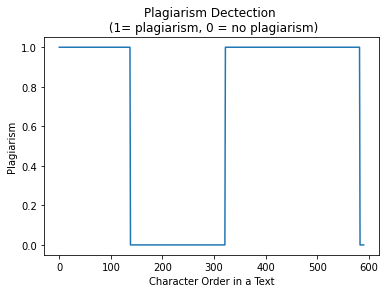

In [93]:
x = 'Elephants are browsing animals, feeding on fruits, leaves, shoots, and tall grasses;\
 they consume hundreds of pounds of food a day and drink up to 50 gal (190 liters) of water.\
  They have no fixed living place, but travel about in herds of up to 100 animals,\
   led by a young, strong male and including young bulls (males), cows (females), and calves.\
    Old males are generally solitary or live in small groups. (Source)\
The largest land mammal on earth, the African elephant weighs up to eight tons.\
 The elephant is distinguished by its massive body, large ears and a long trunk,\
  which has many uses ranging from using it as a hand to pick up objects, as a horn\
   to trumpet warnings, an arm raised in greeting to a hose for drinking water or bathing. (Source)'

y = 'Elephants are browsing animals, feeding on fruits, leaves, shoots, and tall grasses. \
The largest land mammal on earth, the African elephant weighs up to eight tons.\
 They consume hundreds of pounds of food a day and drink up to 50 gal (190 liters) of water.\
  The elephant is distinguished by its massive body, large ears and a long trunk, \
  which has many uses ranging from using it as a hand to pick up objects, \
  as a horn to trumpet warnings, an arm raised in greeting to a hose for drinking water or bathing.'


q = 199
k = 20
output = rh_get_match(x, y, k, q)[0]
hash_table = rh_get_match(x, y, k, q)[1]
print('output = ', output)
print('collisions = ',collision(hash_table))
print('average bucket size = ',average_bucket(hash_table))
print('plagiarism percentage', plagiarism_percentage(x,output,k))
plagiarism_dist(x,output,k)

#### How to decide q in practice?

We choose our prime number q based on
- average bucket size. 
- percentage of collisions

We take test case 3, whose collision is 76% average bucket size is 3, q = 199 as an example. 

Note: average bucket size we calculate is not load factor. Load factor = # of elements / # of buckets. Average bucket size only considers cases when there is more than 1 element in a bucket.

In [94]:
def prime_number_generator(lower, upper):
  '''
  Input
  ------
  lower, upper: lower and upper bound for prime numbers we want 
  
  Output
  ------
  List 
      A list that output a prime numbers in the given range 

  '''
  prime_list = []
  for num in range(lower, upper+1):
    prime = True
    if num > 1: #all prime number needs to be greate than 1 
      for i in range(2,num):    
        if (num%i) == 0: 
          prime = False 
          break 
      if prime == True: 
        prime_list.append(num)
  return prime_list

In [95]:
x = 'Elephants are browsing animals, feeding on fruits, leaves, shoots, and tall grasses;\
 they consume hundreds of pounds of food a day and drink up to 50 gal (190 liters) of water.\
  They have no fixed living place, but travel about in herds of up to 100 animals,\
   led by a young, strong male and including young bulls (males), cows (females), and calves.\
    Old males are generally solitary or live in small groups. (Source)\
The largest land mammal on earth, the African elephant weighs up to eight tons.\
 The elephant is distinguished by its massive body, large ears and a long trunk,\
  which has many uses ranging from using it as a hand to pick up objects, as a horn\
   to trumpet warnings, an arm raised in greeting to a hose for drinking water or bathing. (Source)'

y = 'Elephants are browsing animals, feeding on fruits, leaves, shoots, and tall grasses. \
The largest land mammal on earth, the African elephant weighs up to eight tons.\
 They consume hundreds of pounds of food a day and drink up to 50 gal (190 liters) of water.\
  The elephant is distinguished by its massive body, large ears and a long trunk, \
  which has many uses ranging from using it as a hand to pick up objects, \
  as a horn to trumpet warnings, an arm raised in greeting to a hose for drinking water or bathing.'


prime_list = prime_number_generator(200, 2000)

avg_bucket = []
collisions = []
optimal_q = []
k = 20

for q in prime_list: # loop through different prime number 

  output = rh_get_match(x, y, k, q)[0]
  hash_table = rh_get_match(x, y, k, q)[1]
  collisions.append(collision(hash_table)) #append collisions and average bucket size for different q
  bucket_size = average_bucket(hash_table)
  avg_bucket.append(bucket_size)

  if bucket_size <= 1.15: #Find the optimal bucket size, which bucket size is close to 1
    optimal_q.append(q)

A list of optimal q we can use [1787, 1801, 1847, 1871, 1877, 1913, 1933, 1949, 1951, 1979, 1993, 1999]


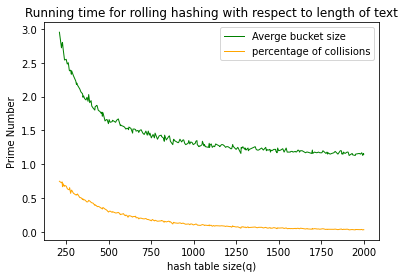

In [96]:
N = [i for i in prime_list]
plt.plot(N, avg_bucket, color = 'green', linewidth = 1.0, label = 'Averge bucket size')
plt.plot(N, collisions, color = 'orange', linewidth = 1.0, label = 'percentage of collisions')
plt.xlabel('hash table size(q)')
plt.ylabel('Prime Number')
plt.title('Running time for rolling hashing with respect to length of text')
plt.legend()

print('A list of optimal q we can use', optimal_q)

In [97]:
#Take q = 1999 as an example. We see 3% of collision with an 1.15 average bucket size
q = 1999
k = 20 
output = rh_get_match(x, y, k, q)[0]
hash_table = rh_get_match(x, y, k, q)[1]
print('output = ', output)
print('collisions = ',collision(hash_table))
print('average bucket size = ',average_bucket(hash_table))

output =  [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (322, 68), (323, 69), (324, 70), (325, 71), (326, 72), (327, 73), (328, 74), (329, 75), (330, 76), (331, 77), (332, 78), (333, 79), (334, 80), (335, 81), (336, 82), (337, 83), (338, 84), (339, 85), (340, 86), (341, 87), (342, 88), (343, 89), (344, 90), (345, 91), (346, 92), (347, 93), (348, 94), (349, 95), (350, 96), (351, 97), (352, 98), (353, 99), (354, 100), (355, 101), (356, 102), (357, 103), (358, 104), (359, 105), (360, 106), (361, 107), (362, 108), (363, 109), (364, 110), (365,

## Question 2: Implementation Ver.2 

The second algorithm is as follows:
- Store all length-k substrings of X into a hash table T_x, using a hash function that does not entail the division method.
- For each substring S_y in Y, compute the hash value h(S_y) and use this hash value to look up S_y in table T_x. If the lookup is successful, then we have a common substring.


**Justification for design choices**

The hash function: In rolling hashing, it will slow down our algorithm to find the correct match and avoid spurious hit if we have lots of collisions. Therefore, in this algorithm, I want to try an extreme approach by creating unique hash values. I choose a hash function with a base of 26 because we have 26 English characters. By doing so, we can ensure our hash value will be unique for string inputs. 
For instance, if we have a string 'abc' under the base of 10, we can calculate the hash value as $1 \times 10^{2} + 2 \times 10^{1} + 3 \times 10^{0} = 123$. However, we can have a match with 'aam' because hash value of 'aal' is $10^{2} + 1 \times 10^{1} + 13 \times 10^{0} = 123$. This shows us the only way to avoid spurious hit is to choose a base of 26 for our hash function. 

- The hash table's size: I test out different sizes to make my hash table as big as possible. Since when I choose a base of 26, the hash value will be large. If I want to choose a big length of substring k, the hash value will be even bigger. Since the biggest constraint here is not using the division method, I would like to have a big hash table to ensure we can include all hash values. 

Data structures: I choose to use a nested list because I  can easily check the string append. After running this algorithm, I realize I should use a dictionary to avoid a large empty table. Also, since the dictionary is still a hash table, but it will rescale based on the input length, I don't need to worry about the size of a hash table. 

In [98]:
#Since we are not using division method, 
#we need to choose a big hashtable or a hash function 
#that doesn't generate big value. 

def hash_function_1(string): 
  '''Calculate hash value of a string 
  
    Inputs
    --------
    string: str
    d: base 
    
    Outputs
    --------
    int
        hash value of the input string 
  '''
  
  #A base of 26: 26 english character 
  d = 26 
  length = len(string)
  hash_value = 0
  for i in range(length):
    hash_value += ord(string[length -i -1])*d**i

  return hash_value 

In [99]:
from tqdm import tqdm

def regular_get_match(x, y, k, hash_function):

  """Finds all common length-k substrings of x and y. NOT using rolling hashing on both strings. 
  
  Input
  --------
  x, y: two input texts
  k: length of substring

  Output:
  --------
  list
    A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
  list 
    Our hash table from x 
  
  """
  
  result = []
  d = 26 #set base
  q = 10**7 #size of the table
  x = preprocessing(x)
  y = preprocessing(y)

  #Create an empty hash table 
  hash_table = empty_hash_table(q)

  #if the length of the string is shorter than the required substring length
  if len(y) < k or len(x) < k: 
      return 'The text is too short'
  if k > 4:
      return 'The substring is too long'

  
  #hash strings in x and put them into the hashtable
  for n in tqdm(range(k,len(x)+1)): 
    x_string = x[n-k:n]
    index = hash_function(x_string)
    
    #Check if the value is in the hash table. In fact, there won't be collisions.
    if hash_table[index] == None:
      hash_table[index] = (x_string, n-k)  
    else:
      hash_table[index].append((x_string, n-k))
  

  #when the length of y is smaller or equal than k
  if len(y) <= k:
    y_index = hash_function(y)
    if hash_table[y_index]:
      for s in hash_table[y_index]:
        if s[0] == y:
          result.append((s[1],0))
    return result, hash_table
    
  
  #when the length of y is greater than k
  y_string = y[:k] #The fisrt y substring 
  y_index = hash_function(y_string)
  
  for i in tqdm(range(len(y)-k+1)):
    #if the hashed index is in the table
    # print(i, y_string)
    if hash_table[y_index]:
      #we check if the characters are the same
      for s in hash_table[y_index]:
        if s[0] == y_string:
          result.append((s[1],i))
      
    if i+k <len(y):
      y_string = y_string[1:] + y[i+k]
      y_index = hash_function(y_string)
  
  return result, hash_table

### Test Case
Find different styles of plagiarism and calculate their plagiarism level and plagiarism distribution in a text

#### Test Case 1: Basic test

100%|██████████| 3/3 [00:00<00:00, 10932.16it/s]


output =  [(0, 0), (1, 1), (2, 2)]
plagirism percentage 62%


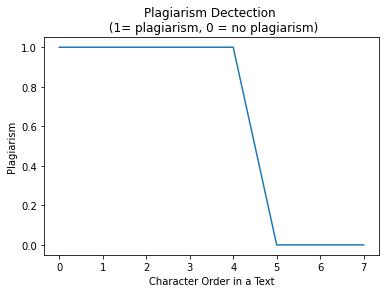

In [96]:
x = 'applepie'
y = 'apple'

k = 3
output = regular_get_match(x, y, k, hash_function_1)[0]
hash_table = regular_get_match(x, y, k, hash_function_1)[1]
print('output = ', output)
print('plagirism percentage', plagiarism_percentage(x,output,3))
plagiarism_dist(x,output,3)

I realized the largest number I can set for the hash table is $10^{7}$ through the basic test case. Otherwise, it takes too long even to generate a hash table. 

Since the base I set is 26, to ensure values will fit into the hash table. The max k I can set is quite restricted. ord(character) x $26^{k} = 10^{7}$. Since ord(character) is relatively small, I assume it is 1. We get k = 4.94, meaning that the max substring I can set for k is 4. I test it with k = 5, it does give me an error of index out of range. 

100%|██████████| 11/11 [00:00<00:00, 6363.77it/s]


output =  [(2, 0), (10, 0)]
collisions =  1e-07
average bucket size =  1.1
plagiarism percentage 46%


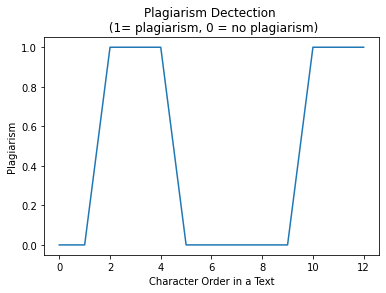

In [97]:
x = 'Today is Monday'
y = 'day'

output = regular_get_match(x, y, k, hash_function_1)[0]
hash_table = regular_get_match(x, y, k, hash_function_1)[1]
print('output = ', output)
print('collisions = ',collision(hash_table))
print('average bucket size = ',average_bucket(hash_table))
print('plagiarism percentage', plagiarism_percentage(x,output,3))
plagiarism_dist(x,output,3)

Since we increase the size of the hash table and set a base that yields us a unique index, we can see that the collision is 1e-07 with an average bucket size of 1.1. It means that there is almost no collision. There is still collision is not due to spurious hit but the repetitive word, 'day.'

Comparing with the rolling algorithm above, whose collisions =  0.6 and average bucket size =  2.75, we see a great improvement in avoiding collisions. 

#### Test Case 2: Find and Replace plagiarism

Find and replace plagiarism is to change some key words of sources, but still copies the main part of sources.

100%|██████████| 328/328 [00:00<00:00, 92114.61it/s]


output =  [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (52, 7), (8, 8), (274, 8), (9, 9), (275, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (246, 14), (15, 15), (16, 16), (17, 17), (31, 17), (153, 17), (225, 17), (18, 18), (19, 19), (20, 20), (188, 20), (21, 21), (189, 21), (22, 22), (190, 22), (23, 23), (191, 23), (212, 23), (239, 23), (252, 23), (270, 23), (304, 23), (24, 24), (192, 24), (25, 25), (26, 26), (27, 27), (28, 28), (34, 31), (35, 32), (36, 33), (37, 34), (38, 35), (39, 36), (40, 37), (41, 38), (194, 38), (42, 39), (214, 39), (43, 40), (44, 41), (140, 41), (166, 41), (45, 42), (264, 42), (46, 43), (47, 44), (48, 45), (49, 46), (50, 47), (51, 48), (7, 49), (52, 49), (53, 50), (54, 51), (105, 51), (216, 51), (258, 51), (55, 52), (56, 53), (57, 54), (58, 55), (283, 55), (305, 55), (59, 56), (306, 56), (60, 57), (307, 57), (61, 58), (62, 59), (63, 60), (64, 61), (65, 62), (66, 63), (67, 64), (68, 65), (135, 65), (69, 66), (136, 66), (70, 67), (71,

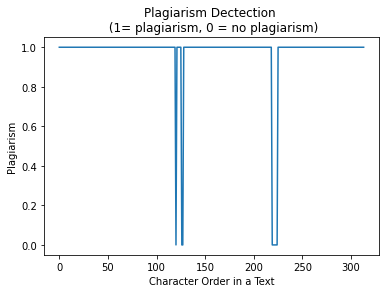

In [99]:
x = 'Elephants are browsing animals, feeding on fruits, leaves, shoots, and tall grasses; \
they consume hundreds of pounds of food a day and drink up to 50 gal (190 liters) of water. \
They have no fixed living place, but travel about in herds of up to 100 animals, led by a young,\
 strong male and including young bulls (males), cows (females), and calves. Old males are \
 generally solitary or live in small groups.'

y = 'Elephants are browsing animals that feed on fruits, leaves, shoots, and tall grasses.\
 They consume hundreds of pounds of food a day and drink up to 50 gal of water. \
 Elephants have no fixed living place, but travel about in herds of up to 100 animals. \
 They are led by a young, strong male. In addition, young bulls (males), cows (females),\
  and calves are part of the group. Old males are generally solitary or live in small groups.'

q = 199
k = 3
output = regular_get_match(x, y, k, hash_function_1)[0]
hash_table = regular_get_match(x, y, k, hash_function_1)[1]
print('output = ', output)
print('collisions = ',collision(hash_table))
print('average bucket size = ',average_bucket(hash_table))
print('plagiarism percentage', plagiarism_percentage(x,output,k))
plagiarism_dist(x,output,k)

There are some collisions because of brakets in the text. Yet, we can still see a very low percentage of collision.

#### Test Case 3: Mashup plagiarism

Mashup plagiarism is to mix copied information from multiple sources. 

100%|██████████| 393/393 [00:00<00:00, 103410.38it/s]


output =  [(0, 0), (359, 0), (389, 0), (1, 1), (360, 1), (390, 1), (2, 2), (361, 2), (391, 2), (3, 3), (362, 3), (392, 3), (4, 4), (363, 4), (393, 4), (5, 5), (6, 6), (7, 7), (8, 8), (274, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (478, 16), (17, 17), (18, 18), (19, 19), (20, 20), (188, 20), (21, 21), (189, 21), (22, 22), (190, 22), (23, 23), (191, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (539, 29), (30, 30), (224, 30), (540, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (436, 53), (54, 54), (488, 54), (55, 55), (56, 56), (57, 57), (58, 58), (305, 58), (59, 59), (306, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (385, 67), (322, 68), (323, 69), (324, 70), (325, 71), (428, 71), (326, 72), (429, 72),

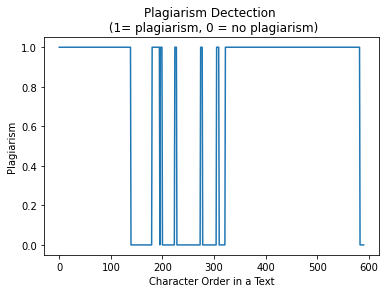

In [102]:
x = 'Elephants are browsing animals, feeding on fruits, leaves, shoots, and tall grasses;\
 they consume hundreds of pounds of food a day and drink up to 50 gal (190 liters) of water.\
  They have no fixed living place, but travel about in herds of up to 100 animals,\
   led by a young, strong male and including young bulls (males), cows (females), and calves.\
    Old males are generally solitary or live in small groups. (Source)\
The largest land mammal on earth, the African elephant weighs up to eight tons.\
 The elephant is distinguished by its massive body, large ears and a long trunk,\
  which has many uses ranging from using it as a hand to pick up objects, as a horn\
   to trumpet warnings, an arm raised in greeting to a hose for drinking water or bathing. (Source)'

y = 'Elephants are browsing animals, feeding on fruits, leaves, shoots, and tall grasses. \
The largest land mammal on earth, the African elephant weighs up to eight tons.\
 They consume hundreds of pounds of food a day and drink up to 50 gal (190 liters) of water.\
  The elephant is distinguished by its massive body, large ears and a long trunk, \
  which has many uses ranging from using it as a hand to pick up objects, \
  as a horn to trumpet warnings, an arm raised in greeting to a hose for drinking water or bathing.'


q = 199
k = 4
output = regular_get_match(x, y, k, hash_function_1)[0]
hash_table = regular_get_match(x, y, k, hash_function_1)[1]
print('output = ', output)
print('collisions = ',collision(hash_table))
print('average bucket size = ',average_bucket(hash_table))
print('plagiarism percentage', plagiarism_percentage(x,output,k))
plagiarism_dist(x,output,k)

From observing all the test case, we see that there aren't much collisions for this algorithm. The percentage of plagiarism differs a little bit. However, the algorithm runs way slower than the rolling hash. 

### Modification of regular hashing algorithm
- Decrease the table size and assign a prime number
- Change the base to 2 to avoid out of index


In [118]:
prime_number_generator(119990, 120000)

[119993]

I choose 119993 as the size of the table. 

In [134]:
#Since we are not using division method, 
#we need to choose a big hashtable or a hash function 
#that doesn't generate big value. 

def hash_function_2(string): 
  '''Calculate hash value of a string 
  
    Inputs
    --------
    string: str
    d: base 
    
    Outputs
    --------
    int
        hash value of the input string 
  '''
  
  #A base of 2
  d = 2
  length = len(string)
  hash_value = 0
  for i in range(length):
    hash_value += ord(string[length -i -1])*d**i

  return hash_value 


def revised_regular_get_match(x, y, k, hash_function):

  """Finds all common length-k substrings of x and y. NOT using rolling hashing on both strings. 
  
  Input
  --------
  x, y: two input texts
  k: length of substring

  Output:
  --------
  list
    A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
  list 
    Our hash table from x 
  
  """
  
  result = []
  q = 119993 #reset the size of the table
  x = preprocessing(x)
  y = preprocessing(y)

  #Create an empty hash table 
  hash_table = empty_hash_table(q)

  #if the length of the string is shorter than the required substring length
  if len(y) < k or len(x) < k: 
      return 'The text is too short'
  # if k > 4:
  #     return 'The substring is too long'

  
  #hash strings in x and put them into the hashtable
  for n in range(k,len(x)+1): 
    x_string = x[n-k:n]
    index = hash_function(x_string)
    
    #Check if the value is in the hash table. In fact, there won't be collisions.
    if hash_table[index] == None:
      hash_table[index] = (x_string, n-k)  
    else:
      hash_table[index].append((x_string, n-k))
  

  #when the length of y is smaller or equal than k
  if len(y) <= k:
    y_index = hash_function(y)
    if hash_table[y_index]:
      for s in hash_table[y_index]:
        if s[0] == y:
          result.append((s[1],0))
    return result, hash_table
    
  
  #when the length of y is greater than k
  y_string = y[:k] #The fisrt y substring 
  y_index = hash_function(y_string)
  
  for i in range(len(y)-k+1):
    #if the hashed index is in the table
    # print(i, y_string)
    if hash_table[y_index]:
      #we check if the characters are the same
      for s in hash_table[y_index]:
        if s[0] == y_string:
          result.append((s[1],i))
      
    if i+k <len(y): #update y string and y index through rolling hashing 
      y_string = y_string[1:] + y[i+k]
      y_index = hash_function(y_string)
  
  return result, hash_table

#### Test Case 3: Mashup plagiarism as a test



100%|██████████| 388/388 [00:00<00:00, 80452.34it/s]


output =  [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (322, 68), (323, 69), (324, 70), (325, 71), (326, 72), (327, 73), (328, 74), (329, 75), (330, 76), (331, 77), (332, 78), (333, 79), (334, 80), (335, 81), (336, 82), (337, 83), (338, 84), (339, 85), (340, 86), (341, 87), (342, 88), (343, 89), (344, 90), (345, 91), (346, 92), (347, 93), (348, 94), (349, 95), (350, 96), (351, 97), (352, 98), (353, 99), (354, 100), (355, 101), (35

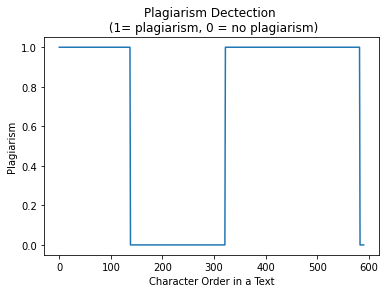

In [123]:
x = 'Elephants are browsing animals, feeding on fruits, leaves, shoots, and tall grasses;\
 they consume hundreds of pounds of food a day and drink up to 50 gal (190 liters) of water.\
  They have no fixed living place, but travel about in herds of up to 100 animals,\
   led by a young, strong male and including young bulls (males), cows (females), and calves.\
    Old males are generally solitary or live in small groups. (Source)\
The largest land mammal on earth, the African elephant weighs up to eight tons.\
 The elephant is distinguished by its massive body, large ears and a long trunk,\
  which has many uses ranging from using it as a hand to pick up objects, as a horn\
   to trumpet warnings, an arm raised in greeting to a hose for drinking water or bathing. (Source)'

y = 'Elephants are browsing animals, feeding on fruits, leaves, shoots, and tall grasses. \
The largest land mammal on earth, the African elephant weighs up to eight tons.\
 They consume hundreds of pounds of food a day and drink up to 50 gal (190 liters) of water.\
  The elephant is distinguished by its massive body, large ears and a long trunk, \
  which has many uses ranging from using it as a hand to pick up objects, \
  as a horn to trumpet warnings, an arm raised in greeting to a hose for drinking water or bathing.'


k = 9
output = revised_regular_get_match(x, y, k, hash_function_2)[0]
hash_table = revised_regular_get_match(x, y, k, hash_function_2)[1]
print('output = ', output)
print('collisions = ',collision(hash_table))
print('average bucket size = ',average_bucket(hash_table))
print('plagiarism percentage', plagiarism_percentage(x,output,k))
plagiarism_dist(x,output,k)

Thanks to the revision, now the max k I can set is 9, and it runs much faster. If ignore ord(character) when calculating $ord(character)*2^k = 11993$, our k is about 13.55. If we consider the character with the biggest ascii code, z, we will get $126*2^k <= 11993$, k is around 6.57. 9 locates between 6.57 and 13.55, so it is a plausible k. Yet, k = 9 is still not the best—it constraints us to only check 2 words at a time. 

### Test out different hash function 

In [164]:
import math

#Mid-square hashing method
def hash_function_3(string): 
  '''Calculate hash value of a string from mid-square hashing methods
  
    Inputs
    --------
    string: str
    d: base 
    
    Outputs
    --------
    int
        hash value of the input string 
  '''
  
  #A base of 2
  d = 2
  length = len(string)
  hash_value = 0
  for i in range(length):
    hash_value += math.sqrt(ord(string[length -i -1])*d**i)

  return int(round(hash_value,0))

#### Test Case 3: Mashup plagiarism as a test

output =  [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (322, 68), (323, 69), (324, 70), (325, 71), (326, 72), (327, 73), (328, 74), (329, 75), (330, 76), (331, 77), (332, 78), (333, 79), (334, 80), (335, 81), (336, 82), (337, 83), (338, 84), (339, 85), (340, 86), (341, 87), (342, 88), (343, 89), (344, 90), (345, 91), (346, 92), (347, 93), (348, 94), (349, 95), (350, 96), (351, 97), (352, 98), (353, 99), (354, 100), (355, 101), (35

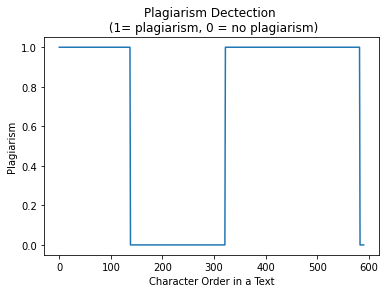

In [166]:
x = 'Elephants are browsing animals, feeding on fruits, leaves, shoots, and tall grasses;\
 they consume hundreds of pounds of food a day and drink up to 50 gal (190 liters) of water.\
  They have no fixed living place, but travel about in herds of up to 100 animals,\
   led by a young, strong male and including young bulls (males), cows (females), and calves.\
    Old males are generally solitary or live in small groups. (Source)\
The largest land mammal on earth, the African elephant weighs up to eight tons.\
 The elephant is distinguished by its massive body, large ears and a long trunk,\
  which has many uses ranging from using it as a hand to pick up objects, as a horn\
   to trumpet warnings, an arm raised in greeting to a hose for drinking water or bathing. (Source)'

y = 'Elephants are browsing animals, feeding on fruits, leaves, shoots, and tall grasses. \
The largest land mammal on earth, the African elephant weighs up to eight tons.\
 They consume hundreds of pounds of food a day and drink up to 50 gal (190 liters) of water.\
  The elephant is distinguished by its massive body, large ears and a long trunk, \
  which has many uses ranging from using it as a hand to pick up objects, \
  as a horn to trumpet warnings, an arm raised in greeting to a hose for drinking water or bathing.'


k = 9
output = revised_regular_get_match(x, y, k, hash_function_3)[0]
hash_table = revised_regular_get_match(x, y, k, hash_function_3)[1]
print('output = ', output)
print('collisions = ',collision(hash_table))
print('average bucket size = ',average_bucket(hash_table))
print('plagiarism percentage', plagiarism_percentage(x,output,k))
plagiarism_dist(x,output,k)

Here we see that there aren't many collisions for the mid-square hash function, but if there is a collision, we will have a big bucket size. Big bucket size might be due to the nature of taking square roots. For instance,  $\sqrt{10000} = 100$ while $\sqrt{12000} = 109$, meaning that there will be around 2000 numbers collides in index 100 - 109 (9 slots). We might need open addressing to solve this because we will have a long chain if we use a chaining method.

**Reflection**

Through my experiment, I find a big trade off between space and time. When we have a big size of hash table and hash function that can evenly distribute items in the table, we have much less collisions, which decreases our look up time. On the other hand, if we have small space, it will have lower collisions and lower load factor. Since the hash table I use here is a nested list, it takes a long time to set it up, and therefore affects the running time too. 

In addition, I realize I can use mid square method if I cannot use division to solve my problem of big hash table. 

## Question 3

- Carefully describe how you would use the code above to investigate the extent of plagiarism. 
- Enumerate potential pitfalls and challenges of applying this algorithm for real-life use. 
- Make sure you justify all the assumptions you make.

**Application for the string matching algorithms**

We can use those algorithms with a plagiarism distribution plot and plagiarism percentage calculator. In practice, we can calculate the plagiarism percentage and double-check our target text when the percentage is high. Using a plagiarism distribution plot makes it even more convenient for us to find the place when plagiarism occurs. Since we see that different string matching algorithms and different choices of k could yield different plagiarism percentages, we can apply different algorithms and potentially construct a confidence interval for plagiarism percentage in the future. 

**Limitations for the string matching algorithms**
- The matching algorithms only compare two texts. It means that we can have only one source text and one target text we want to check for plagiarism. Though we recycle our function to check more sources, we might want to check our target text with all the potential sources online in the real-world scenario. 
- There are different kinds of plagiarism and citation methods, but we only check the character match. If an author cites our quote in the source text correctly, he/she can be exempted from plagiarism. Our string matching algorithms are not able to include this at this moment. 
- If the length of substring k is too small, we might have lots of false positive for plagiarism. For instance, if we have a substring of 3, 'day' in 'Monday' will match with 'Tuesday,' 'holiday,' and 'birthday.' Yet, it might not be sufficient to imply plagiarism. 
- Punctuation can affect the meaning of a sentence. For instance, when someone says, "Let's cook, Esther," it is totally different from "Let's cook Esther." However, in our detector, we will have a 100% of plagiarism. 
- The usage of terminologies might create false positives. For instance, 'cognitive niche' is a terminology that is often used in psychology about intelligence. If an author we to explain a related concept, she/he might use a lot of it. Yet, using terminologies should not be counted as plagiarism. 

## Question 4: Time complexity of each algorithmic version

- Discuss the time complexity of each algorithmic version. 
- Compare and contrast the two versions by experimenting on self-generated inputs. 

You are encouraged to generate inputs of various natures as that would be more likely to tease out the strengths and/or weaknesses of the versions.

In [125]:
import random 
def random_text_generator(length):
  '''
  Input 
  ------
  length: input length 
  
  Output
  ------
  str
    A random string with a length of input length

  '''
  letters = 'abcdefghijklmnopqrstuvwxyz'
  output_string = ''.join((random.choice(letters) for i in range(length)))
  return output_string

#### Plot running time for rolling hashing with different length of input

In [128]:
import time 
n = 250
N = [i for i in range(n)]
k = 5
q = 199
rolling_hashing_time = []
iterations = 10
for i in range(n):
  for _ in range(iterations):
    x = random_text_generator(i)
    y = random_text_generator(i)
    start_time = time.time()
    rh_get_match(x, y, k, q)
    end_time = time.time()
    sum_time = end_time - start_time
  rolling_hashing_time.append(sum_time/iterations)

Text(0.5, 1.0, 'Running time for rolling hashing with respect to length of text')

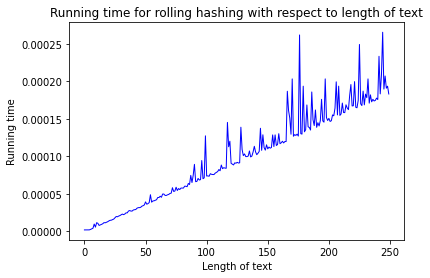

In [129]:
plt.plot(N, rolling_hashing_time, color = 'blue', linewidth = 1.0)
plt.xlabel('Length of text')
plt.ylabel('Running time')
plt.title('Running time for rolling hashing with respect to length of text')

**Time complexity for rolling hashing**

We adopt the method of rolling hashing from rabin karp algorithm for two text x and y. If len(y) = n, and len(x) = m, the time compexity 
- for preprocessing:  $\theta(n)$ and $\theta(m)$
- for putting x into a hash table through rolling hashing: $\theta(n-k+1)$ 
- for looking up y substring in x hash table through rolling hashing: $\theta(m-k+1)rk$ 
 - We loop through y substring: $\theta(m-k+1)$ 
 - We perfrom exact check when there is a matched hash value. If there is r match, we need $O(rk)$ to compare 
 - Therefore, the complexity should be $O(m-k+1)rk$ 
The total time complexity for our rolling hashing algorithm is $O(m-k+1)rk$. 

If r and k are relatively small, we might be able to ignore it. From the graph, we can also see that the growth of time for growing length is linear. 

Compared to rolling's hashing time complexity with the naive matching method, we prefer rolling hashing. The naive hashing method is a method we pick a fixed length of substring k, but we compare one character to but character to see if there is an exact match. 
The time complexity for naive match is $O(mn-(m-n)k+1)k$. For instance, if we have 'applepie' as y and 'apple' as x,  we will have 4 rollings and 5 checks(because len(apple) = 5), which shows that the time complexity is $O(m-k+1)k$.

Yet, since we need to consider rolling x too, we multiply $O(m-k+1)k$ with $O(n-k+1)$. The total time complexity for naive matching is $O(mn-(m-n)k+1)k$. It shows that rolling hashing is a better method than naive matching. 

#### Plot running time for hash function base 26, hash table size of $10^7$ with different length of input

In [138]:
n = 30
N = [i for i in range(n)]
k = 3

hash_function_1_time = []
iterations = 1
for i in range(n):
  for _ in range(iterations):
    x = random_text_generator(i)
    y = random_text_generator(i)
    start_time = time.time()
    regular_get_match(x, y, k, hash_function_1)
    end_time = time.time()
    sum_time = end_time - start_time
  hash_function_1_time.append(sum_time/iterations)

100%|██████████| 27/27 [00:00<00:00, 88335.58it/s]


Text(0.5, 1.0, 'Running time for hash function base 26 with respect to length of text')

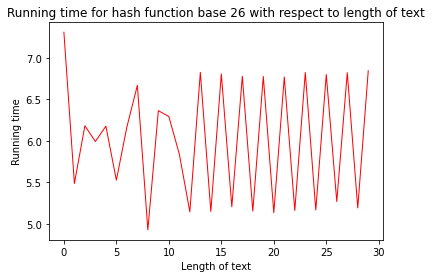

In [151]:
plt.plot(N, hash_function_1_time, color = 'red', linewidth = 1.0, label = 'regular hash function base 26')
plt.xlabel('Length of text')
plt.ylabel('Running time')
plt.title('Running time for hash function base 26 with respect to length of text')

From the graph, we see that it takes 5-7 minutes to run this algorithm, which is long. From the running time, we see that it is a pretty suboptimal algorithm. I decrease the iteration to 1 and the length of the text to 50 because the running time is way too long. Decreasing iterations makes two algorithms incomparable. Since regular hashing performs badly even under 1 iteration, we can conclude that rolling hashing is a much better algorithm. 

**Time complexity for regular hashing without division method** 

In regular hashing, we hash every character again. For instance, in 'apple' and k = 3, we hash app, ppl, ple. We hash 3 x 5 = 15 times. Therefore for x with a length of m and y with a length of n, it takes $\theta(k(m-k+1))$ and $\theta(k(n-k+1))$. As we have explained the naive matching above, our time complexity for regular matching is $O(mn-(m-n)k+1)k$. Though it is so much worse than rolling hashing, another reason for the dysfunction of this algorithm comes from creating a hash table. Creating a hash table takes $O(n^2)$, but it slows down the algorithm since we set a large n.



#### Plot running time for hash function base 2, hash table size of 11993 with different length of input

In [135]:
n = 100
N = [i for i in range(n)]
k = 5
iterations = 10
hash_function_2_time = []

for i in range(n):
  for _ in range(iterations):
    x = random_text_generator(i)
    y = random_text_generator(i)
    start_time = time.time()
    revised_regular_get_match(x, y, k, hash_function_2)
    end_time = time.time()
    sum_time = end_time - start_time
  hash_function_2_time.append(sum_time/iterations)

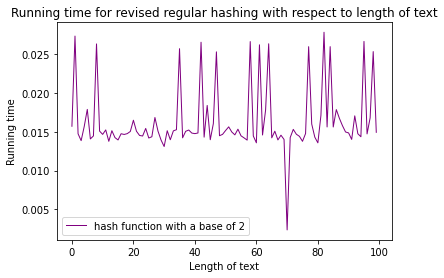

In [137]:
plt.plot(N, hash_function_2_time, color = 'purple', linewidth = 1.0, label = 'hash function with a base of 2')
plt.xlabel('Length of text')
plt.ylabel('Running time')
plt.title('Running time for revised regular hashing with respect to length of text')
plt.legend()

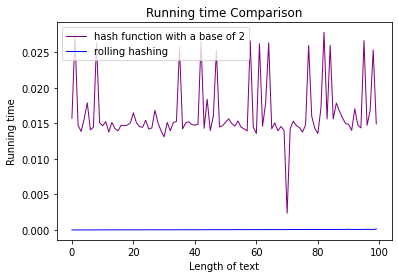

In [149]:
N = [i for i in range(100)]
plt.plot(N, hash_function_2_time, color = 'purple', linewidth = 1.0, label = 'regular hash function with a base of 2')
plt.plot(N, rolling_hashing_time[:100], color = 'blue', linewidth = 1.0, label = 'rolling hashing')
plt.xlabel('Length of text')
plt.ylabel('Running time')
plt.title('Running time Comparison for revised regular hashing and rolling hashing')
plt.legend()

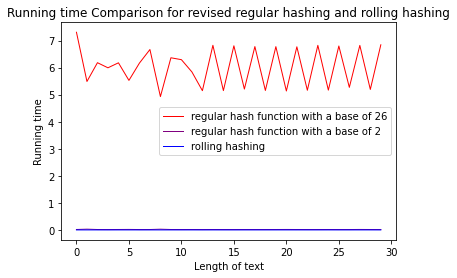

In [153]:
N = [i for i in range(30)]
plt.plot(N, hash_function_1_time, color = 'red', linewidth = 1.0, label = 'regular hash function with a base of 26')
plt.plot(N, hash_function_2_time[:30], color = 'purple', linewidth = 1.0, label = 'regular hash function with a base of 2')
plt.plot(N, rolling_hashing_time[:30], color = 'blue', linewidth = 1.0, label = 'rolling hashing')
plt.xlabel('Length of text')
plt.ylabel('Running time')
plt.title('Running time Comparison for revised regular hashing and rolling hashing')
plt.legend()

Comparing through algorithms, rolling hashing is still the best. 

## Question 5: HCs and LOs
- List all the LOs and HCs you have exercised while working on this final assignment as well as a thorough justification of their application. 
- Review your previous assignments and in-class grades, and reflect on your application of these LOS has evolved over time

***#Breakitdown***
***#AlgorithmicStrategies***

When I am trying to construct a plagiarism detector, I break it down the string into different ways and try to brainstorm potential outcomes from it. 
1. Hash by a specific length of string k: The advantage is to have a consistent length of a string in our hash table. The disadvantage is to store lots of non-meaningful words in the hash table, especially when the k is too small since the average length of an English word 4.7 characters. It is more meaningful to have several words to check at once. For instance, if we check 4 words we have 4.7 x 4 = 18.8 ~20 characters. Therefore, I set some k as 20. 
2. Hash by words: I prefer this method more initially because I think it is more meaningful to check by words than characters. However, since words have varying lengths, we cannot deploy rolling hashing in this case. 

I also think to break down two ways of rolling hashing 
1. Rolling hashing for one character 
2. Rolling hashing for more than one character: For instance, if our k = 3, our x = 'TodayisMonday', and y  = 'day,'  another potential is to hash x for every three characters, tod, aye, ism, ond, ay. I develop this method because the time complexity for this method is len(x)/k, much smaller than len(x-k+1). Yet, I realize this method will suffer too much information loss. For instance, in our current case, we won't be able to detect day. Therefore, it might not be the best way to go. 

By breaking down the problem from different perspectives, I understand how to construct a rolling hashing algorithm. 

***#Dataviz***

I like the data creation of finding locations of plagiarism. Though I have a plagiarism calculator, it only provides a single value. If we compare two longe text, the plagiarism distribution plot offers a quick way to locate paragraphs related to plagiarism. For instance, given two texts with the same level of plagiarism, if one shows a high density of plagiarism in a specific section, while the other sparse in different locations, the one with high density might be more subjected to plagiarism. There is a chance that the other one also plagiarises, but it can also be terminologies in some specific fields that need to be used. 


***#CodeReadability***

I comment on my functions and create docstrings that  follows the conventions consistently. 


***#ComputationalCritique***

I contrast two hashing algorithms of their time complexity, hash table size(q), and constraints on k. In rolling hashing, I provide Justification and examples of choosing a good q and analyzing its time complexity. For regular hashing, I explain my choice of large hash table size due to 26 as my base and no division allowed, elaborating with the constraints of k. Besides time complexity analysis, I also explain why the algorithm is suboptimal due to the data structure of the hash table. 



## References: 
- Cormen et al., ibid, Part VII, section 32
- 9.2 Rabin-Karp String Matching Algorithm. (2018, March 30). [Video]. YouTube. https://www.youtube.com/watch?v=qQ8vS2btsxI
- Liedke, L., Ahlgren, M., Germain, M., Mshengu, S., Mkhungo, T., Clayton, &amp; Clay. (2021, March 21). What is plagiarism? (types of plagiarism + examples &amp; quiz). Retrieved April 23, 2021, from https://www.websitehostingrating.com/plagiarism/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cp "./drive/My Drive/CS110 Code/CS110_final.ipynb" ./
!jupyter nbconvert --to pdf 'CS110_final' 

[NbConvertApp] Converting notebook CS110_final.ipynb to pdf
[NbConvertApp] Support files will be in CS110_final_files/
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Making directory ./CS110_final_files
[NbConvertApp] Writing 205019 bytes to ./notebook

In [6]:
!apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended


Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-fonts-recommended set to manually installed.
texlive-xetex is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  texlive-generic-recommended
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 15.9 kB of archives.
After this operation, 69.6 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 texlive-generic-recommended all 2017.20180305-1 [15.9 kB]
Fetched 15.9 kB in 0s (67.8 kB/s)
Selecting previously unselected package texlive-generic-recommended.
(Reading database ... 186876 files and directories currently installed.)
Preparing to unpack .../texlive-generic-r